In [16]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
restaurant = pd.read_csv('restaurants.csv')
menus = pd.read_csv('restaurant-menus.csv')


restaurant.shape, menus.shape

((40227, 11), (3375211, 5))

In [3]:
restaurant.head(10)

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700
5,6,75,Ocean Restaurant,NaN,NaN,"Seafood, Sushi, Steak",$$,"1218 20th Street South, Birmingham, AL, 35205",35205,33.498630,-86.795740
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440
7,8,26,Little India,NaN,NaN,"Vegetarian, Asian, Asian Fusion, Chinese, Indi...",$,"2236 Highland Ave, Birmingham, AL, 35205",35205,33.502259,-86.790298
8,9,136,Captain D's (1284 Decatur Hwy),NaN,NaN,"Seafood, Fast Food, Fish and Chips, American",$,"1284 Decatur Hwy, Gardendale, AL, 35071",35071,33.657100,-86.811970
9,10,51,Cajun Bistro Express,NaN,NaN,"Desserts, Vegetarian, Coffee and Tea",$,"1515 Pearson Ave SW, Birmingham, AL, 35211",35211,33.486840,-86.856300


In [4]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40227 entries, 0 to 40226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            40227 non-null  int64  
 1   position      40227 non-null  int64  
 2   name          40227 non-null  object 
 3   score         22254 non-null  float64
 4   ratings       22254 non-null  float64
 5   category      40204 non-null  object 
 6   price_range   33581 non-null  object 
 7   full_address  39949 non-null  object 
 8   zip_code      39940 non-null  object 
 9   lat           40227 non-null  float64
 10  lng           40227 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 3.4+ MB


## Label Encoding the price range column

In [5]:
restaurant['price_range'] = restaurant['price_range'].map({'$':1, '$$':2, '$$$':3, "$$$$":3})

In [6]:
# stripping the leading and trailing whitespace 
restaurant['name'] = restaurant['name'].apply(lambda x: x.strip())

### Handling Null Value

In [7]:
# Percentage of NUll in restaurant data

(restaurant.isnull().sum() / restaurant.shape[0])*100

id               0.000000
position         0.000000
name             0.000000
score           44.678947
ratings         44.678947
category         0.057176
price_range     16.521242
full_address     0.691078
zip_code         0.713451
lat              0.000000
lng              0.000000
dtype: float64

In [118]:
# name = [k for k,v in restaurant[restaurant['ratings'].isnull()]['name'].value_counts().iteritems() if v >= 10 ]

# for k in name:
#     selected_df = restaurant[restaurant['name']==k]
#     s = r = 0
#     if selected_df.shape[0] >= 10:
#         s = selected_df['score'].mean()
#         r = selected_df['ratings'].mean()
        
#         print(f'Restaurant Name:{k}, Score : {s}, Ratings : {r}')
    
#         restaurant.loc[(restaurant['name']=='The Ice Cream Shop') & (restaurant['score'].isnull() == True), 'score'] = np.round(s, 2)
#         restaurant.loc[(restaurant['name']=='The Ice Cream Shop') & (restaurant['ratings'].isnull() == True), 'ratings'] = np.round(r, 2)

            score   ratings
score    1.000000  0.172997
ratings  0.172997  1.000000


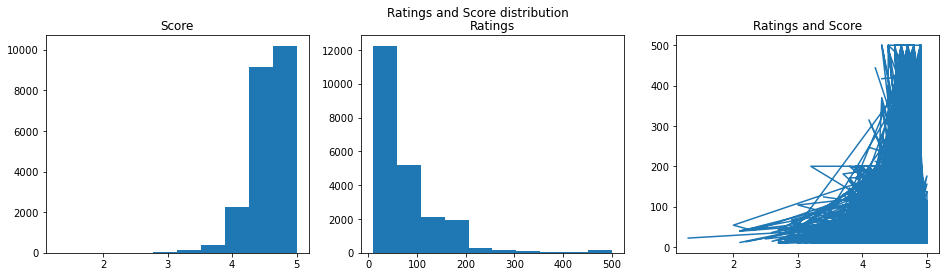

In [8]:
print(restaurant[['score', 'ratings']].corr())

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))
fig.suptitle('Ratings and Score distribution')

ax1.hist(restaurant['score'])
ax1.set_title('Score')

ax2.hist(restaurant['ratings'])
ax2.set_title('Ratings')

ax3.plot(restaurant['score'], restaurant['ratings'])
ax3.set_title('Ratings and Score')

plt.show()

We can clearly see that score and ratings are not co-related to each other. Having a good score doesn't mean that we'll have a good rating and vice-versa.

Since, both score and ratings have almost 45% of null value. So, for now we're not touching the columns for further analysis.

In [9]:
# dropping null values from full address and zipcode as they are below 1%


restaurant.dropna(subset=['full_address', 'zip_code'], axis='index', inplace=True)

# How many Restaurants are around the USA?

In [10]:
df = pd.DataFrame({'Address':restaurant['full_address']})
df.head()

,Address
0,"224 Daniel Payne Drive, Birmingham, AL, 35207"
1,"1521 Pinson Valley Parkway, Birmingham, AL, 35217"
2,"541-B Graymont Ave, Birmingham, AL, 35204"
3,"1580 Montgomery Highway, Hoover, AL, 35226"
4,"314 17th St N, Birmingham, AL, 35203"


In [11]:
df['US State code'] = df['Address'].apply(lambda x: x.split(',')[-2].strip())

In [12]:
us_states = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
            'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
            'TX','UT','VT','VA','WA','WV','WI','WY',]

df['In_usa'] = df['US State code'].apply(lambda x: True if x in us_states else False)

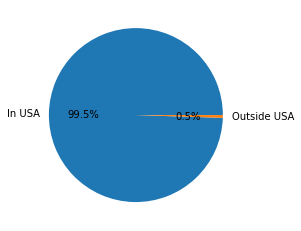

In [13]:
plt.pie(df['In_usa'].value_counts(), labels=['In USA', 'Outside USA'], autopct='%1.1f%%')
plt.show()

99.5 % of the restaurants are around USA which is just as expected. Since this data is of Uber Eats USA

# Is there any relationship between the price level and the popularity of a restaurant?

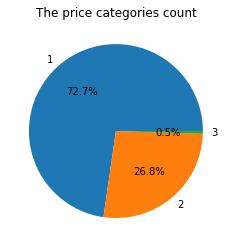

In [116]:
# sns.countplot(x ='price_range', data = restaurant)
plt.pie(restaurant['price_range'].value_counts(), labels=['1', '2', '3'], autopct='%1.1f%%')
plt.title('The price categories count')
plt.show()

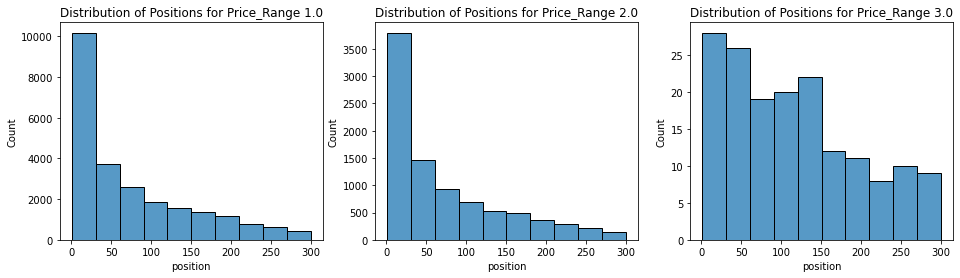

In [117]:
g = restaurant.groupby(['price_range'])

fig, axes = plt.subplots(1, 3, figsize=(16,4))
c = 0
for i,df in g.__iter__():
    sns.histplot(df['position'], bins=10, ax=axes[c])
    axes[c].set_title(f'Distribution of Positions for Price_Range {i}')
    c += 1
plt.show()

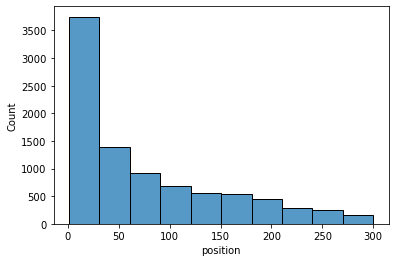

In [131]:
# This takes a sample from a given price range and plots a hisotgram plot of postion

sns.histplot(restaurant.groupby(['price_range']).get_group(1.0)['position'].sample(9000) , bins=10)
plt.show()

### Conclusion:

-- The restaurants having price range and range 2 follows same distribution , in which majority (almost 72% ) of the restaurants are in top 50 on popularity scale whihc is expected as genrally people prefer to go to restaurant whihc are cheap.
    SO, finally we can say that the cheaper the price more the chances of being it a popular restaurant.

-- The most expensive restaurants doesn't imply any clear relation with price and populariy level. As almost equal number of restaurants are popular and not so popular

72.13010204081633

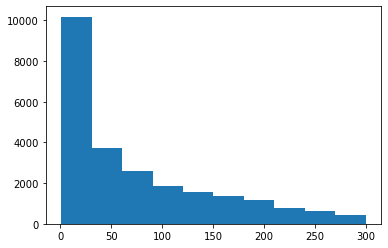

In [165]:
# this code telling uis the percentage of top 50 popularity counts
d = restaurant.groupby(['price_range']).get_group(1.0)['position']
x = plt.hist(d ,bins=10)
x[0][0] / (x[0][1:].sum()) *100

# Which menus are more expensive?

In [3]:
menus.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [4]:
menus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375211 entries, 0 to 3375210
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   restaurant_id  int64 
 1   category       object
 2   name           object
 3   description    object
 4   price          object
dtypes: int64(1), object(4)
memory usage: 128.8+ MB


In [5]:
#stripping the trailing and leading whitespaces from the category
menus['category'] = menus['category'].apply(lambda x: x.strip())

# checking the unique categories count
menus['category'].nunique()

50338

In [40]:
# grouping the data by category so that we could have the max price of each category
g = menus.groupby(['category'])['price']
new_df = pd.DataFrame(columns=['category', 'price'])

for i, df in g.__iter__():
    new_df = new_df.append({'category':i
                   ,'price':df.max()}, ignore_index=True)

new_df.sort_values(by=['price'], ascending=False, inplace=True, ignore_index=True)

In [87]:
menus['USD'] = menus['price'].apply(lambda x: float(x.split()[0]))

In [99]:
menus.drop(menus.loc[menus['USD']==999.99].index, inplace=True)

In [94]:
index_names = menus[menus['USD']==999.99 ].index
index_names

Int64Index([1059122, 1571635, 1950831, 1950833, 2282480, 2911836, 2911842,
            3295962, 3295965],
           dtype='int64')

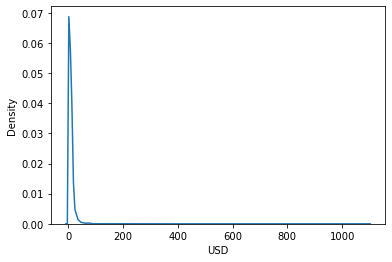

In [100]:
sns.kdeplot(data=menus, x='USD')
plt.show()

- 94% of the food items costs less than 80 USD
- 76% of the food items costs less than 50 USD
- 50% of the food items costs less than 25 USD

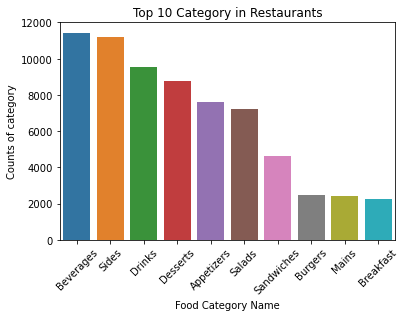

In [52]:
# Grouping by restaurants as each res_id has many repeated category
r = menus.groupby('restaurant_id')['category'].unique()

cat_count_dic = {}

for ind, row in r.iteritems():
    for i in row:
        if cat_count_dic.get(i) :
            cat_count_dic[i] += 1
        else:
            cat_count_dic[i] = 1
            
cat_count_dic = sorted(cat_count_dic.items(), key=lambda item: item[1], reverse=True)
res = {k:v for k,v in cat_count_dic[1:11]}

cat_name = list(res.keys())
counts = list(res.values())

sns.barplot(x=cat_name, y=counts)
plt.xticks(rotation=45)
plt.xlabel('Food Category Name')
plt.ylabel('Counts of category')
plt.title('Top 10 Category in Restaurants')
plt.show()

Beverages and Sides are the most available category in restaurants.

In [56]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

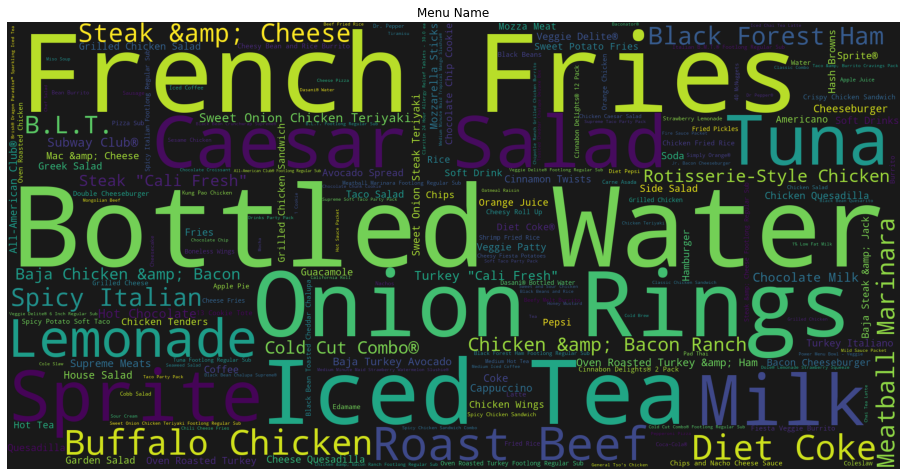

In [59]:
plt.figure(figsize=(16,10))
data = menus['name'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='#191919').generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Menu Name')
plt.axis('off')
plt.show()

In [60]:
menus['price'].shape

(3375211,)

In [75]:
menus[menus['price']< '25.00 USD'].shape

(1755341, 5)

In [76]:
1755341 / 3375211

0.5200685231234432